<a href="https://colab.research.google.com/github/KimyYoungWook/DataScience/blob/main/practice/%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5(Supervised_learning)_%EB%B6%84%EB%A5%98_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mglearn

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [6]:
import mglearn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


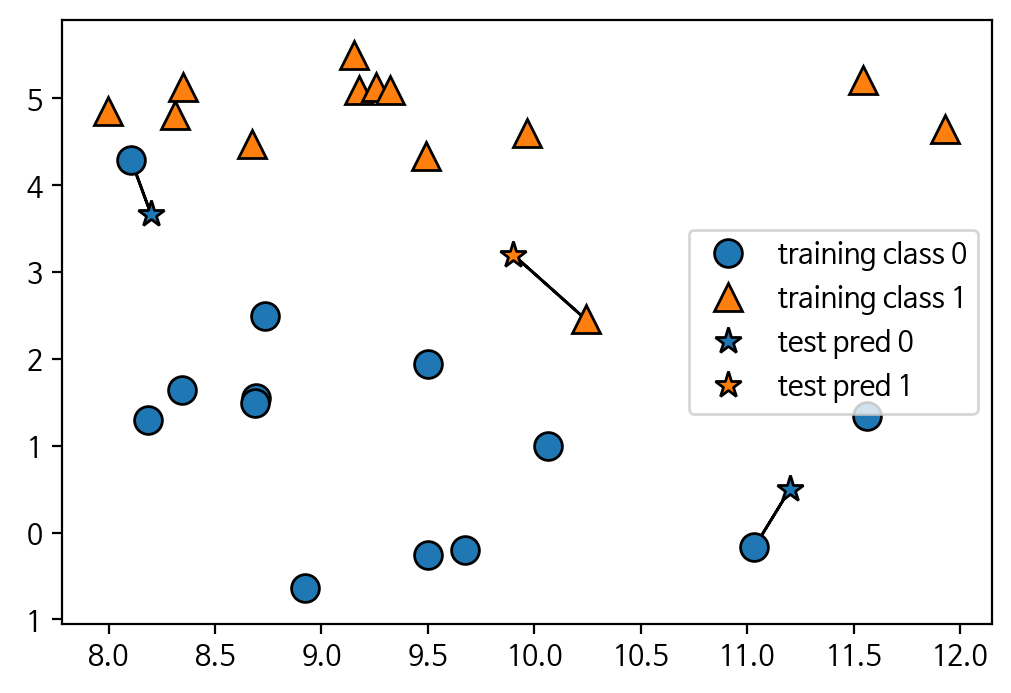

In [7]:
plt.figure(dpi=100)
plt.rc('font', family='NanumBarunGothic') 

mglearn.plots.plot_knn_classification(n_neighbors=1) # 제일 근접한 1개 이웃 선택

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


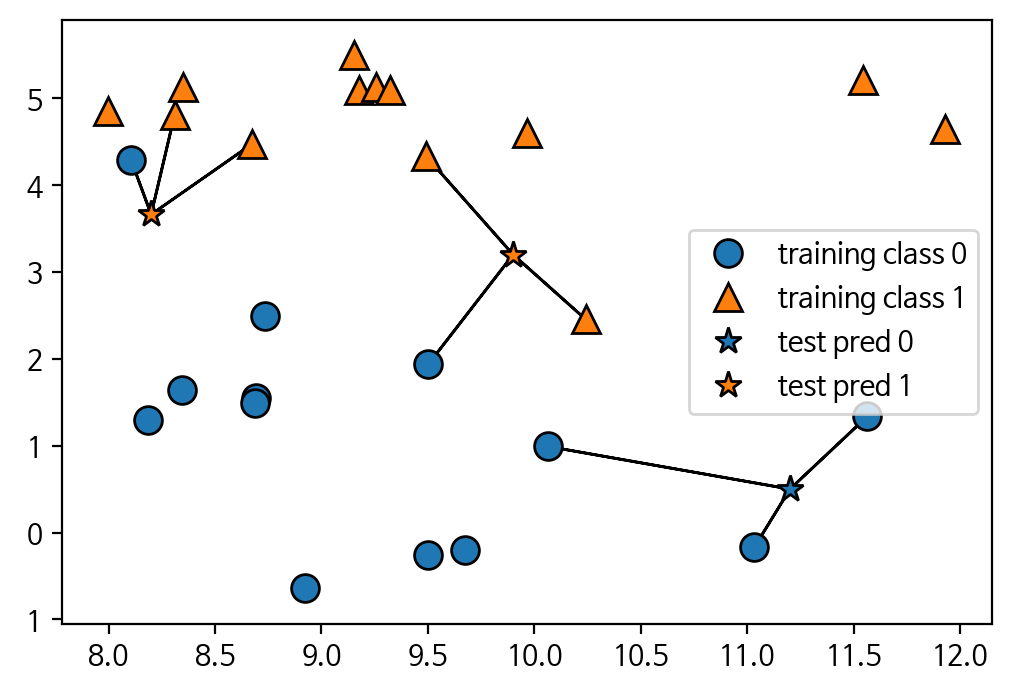

In [8]:
plt.figure(dpi=100)
plt.rc('font', family='NanumBarunGothic') 

mglearn.plots.plot_knn_classification(n_neighbors=3) # 제일 근접한 1개 이웃 선택

분류 문제 정의 : forge 데이터 셋을 사용한 이진 분류(Label,1) 예측하기<br>
k-최근접 이웃 알고리즘 적용 하여 예측하고 평가하기

데이터 준비하기

In [9]:
X,y = mglearn.datasets.make_forge()# X : 데이터(feature), y : 레이블(label, 정답)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [10]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

일반화 성능을 평가할 수 있도록 데이터 분리(교차검증) -> 훈련세트(trainset) 테스트세트(testset)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=7) # 순서 중요

 KNeighborsClassifier를 임포트하고 객체 생성

In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)

In [13]:
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

훈련 세트를 사용하여 분류 모델 학습

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

테스트 데이터에 대해 predict 매서드를 호출해서 예측

테스트 세트의 각 데이터 포인트에 대해 특정 세트에서 가장 가까운 이웃을 계산 -> 다음 가장 많은 클래스를 찾기

In [15]:
clf.predict(X_test)

array([0, 1, 0, 0, 0, 0, 1])

모델이 얼마나 잘 일반화되었는지 평가 -> 정확도

score() 함수를 사용 -> 정확도 측정

In [16]:
clf.score(X_test,y_test)

0.7142857142857143

In [17]:
clf.score(X_train,y_train)

1.0

KNeighborsClassifier 분석


*   이웃을 하나 선택 했을 때는 결정 경계가 훈련데이터의 가깝게 따라가고 있음
*   이웃의 수를 늘릴수록 결정 경계는 더 부드러워짐
*   부드러운 경계는 더 단순한 모델을 의미






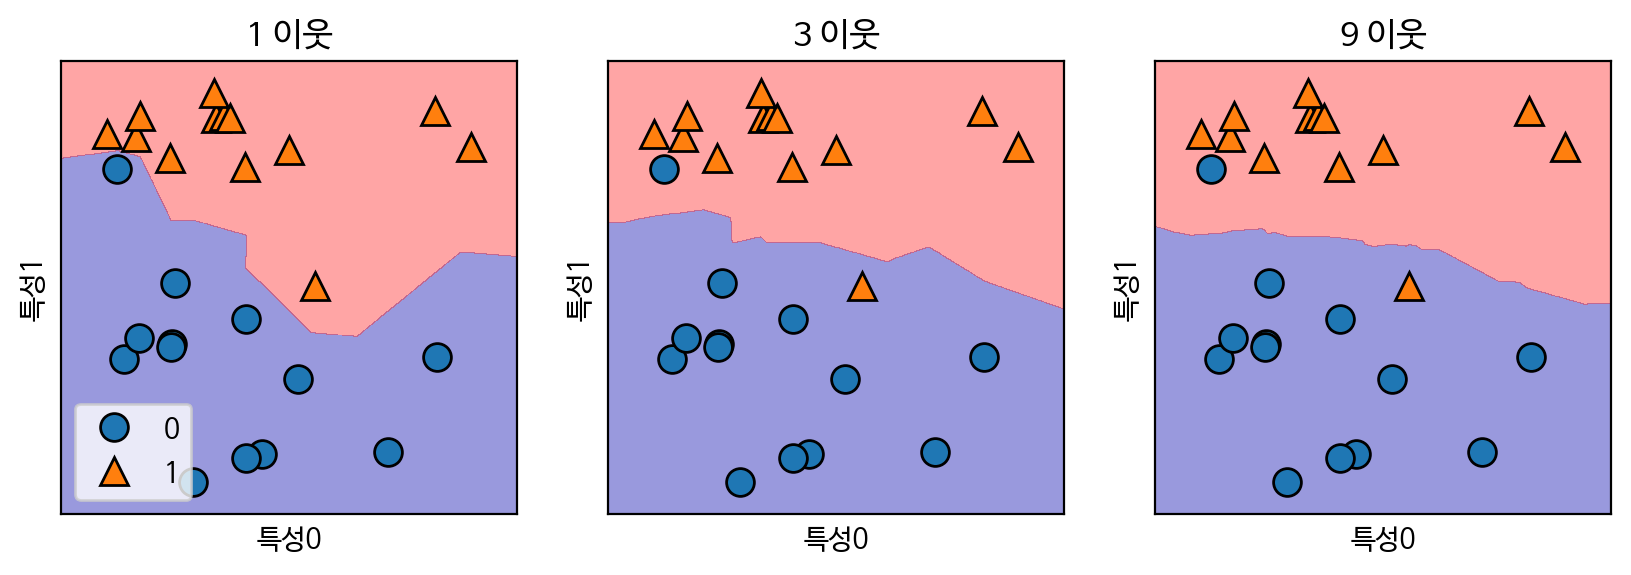

In [18]:
fig, axes = plt.subplots(1,3,figsize=(10,3),dpi=100)
for n_neighbors, ax in zip([1,3,9],axes) : # 이웃을 1,3,9 d일떄의 결정 경계
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
  # 2차원 데이터셋 분할 평면 그리기 mglearn.plot_2d_separator(model 객체, train 데이터, 평면 칠하기, 투명도)
  mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
  mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
  ax.set_title("{} 이웃".format(n_neighbors))
  ax.set_xlabel("특성0")
  ax.set_ylabel("특성1")
axes[0].legend(loc=3)
plt.show() 

이웃의 수(결정경계)에 따른 성능평가

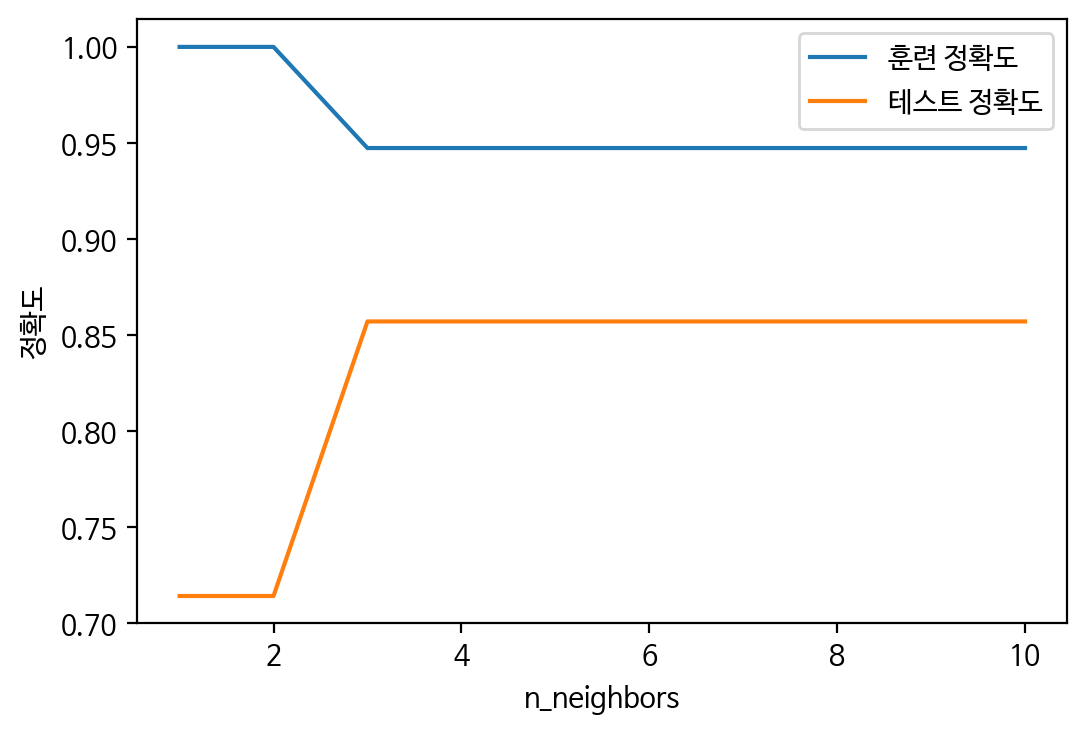

In [19]:
# 이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuracy=[]

# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings :
  #모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train,y_train)

  # 훈련 세트 정확도 저장
  train_accuracy.append(clf.score(X_train,y_train))

  # 테스트 세트 정확도 저장
  test_accuracy.append(clf.score(X_test,y_test))
  
# 훈련 VS 테스트 정확도 시각화
plt.figure(dpi=100)
plt.rc('font', family='NanumBarunGothic') 
plt.plot(neighbors_settings,train_accuracy,label='훈련 정확도')
plt.plot(neighbors_settings,test_accuracy,label='테스트 정확도')
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

유방암 데이터 셋을 사용하여 이웃의 수(결정경계)에 따른 성능 평가

데이터 준비하기

In [22]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() # 데이터 다운로드

데이터셋 분리하기(훈련셋,테스트셋)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    cancer.data,cancer.target,stratify=cancer.target, random_state=777
)#stratify=cancer.target : 극단적인 경우 어느정도 고려해서 테스트와 훈련셋을 나눠주는 옵션

이웃의 수(결정경계)에 따른 성능 평가

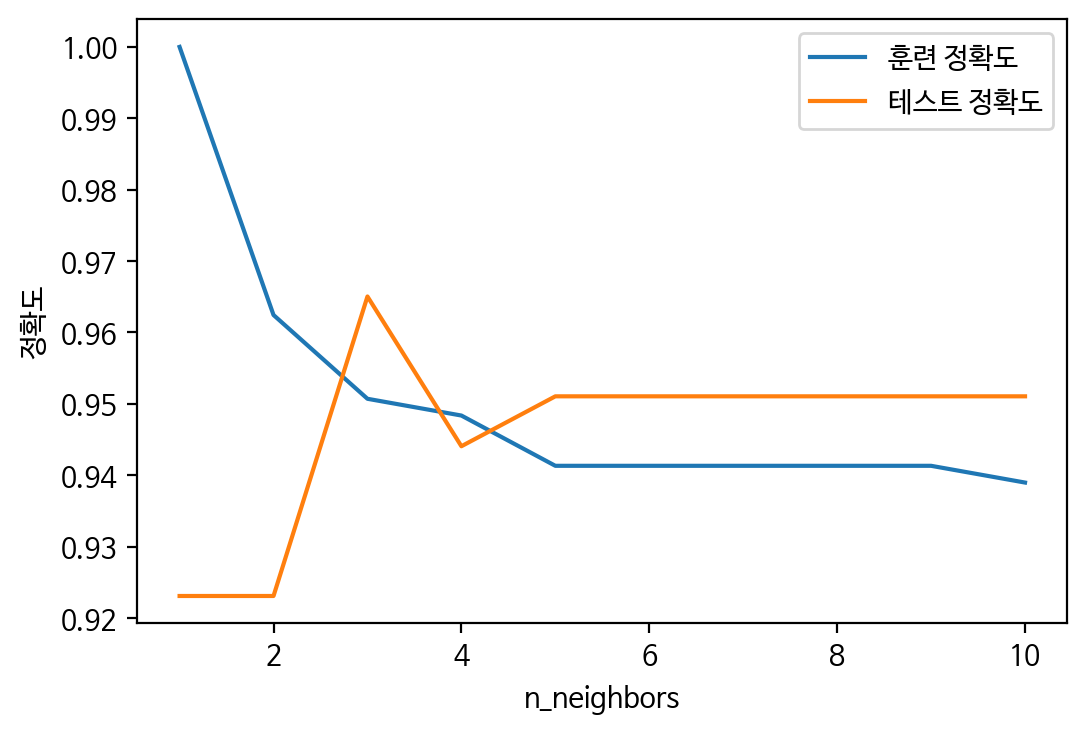

In [24]:
# 이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuracy=[]

# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings :
  #모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train,y_train)

  # 훈련 세트 정확도 저장
  train_accuracy.append(clf.score(X_train,y_train))

  # 테스트 세트 정확도 저장
  test_accuracy.append(clf.score(X_test,y_test))
  
# 훈련 VS 테스트 정확도 시각화
plt.figure(dpi=100)
plt.rc('font', family='NanumBarunGothic') 
plt.plot(neighbors_settings,train_accuracy,label='훈련 정확도')
plt.plot(neighbors_settings,test_accuracy,label='테스트 정확도')
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

선능평가 - ROC 커브

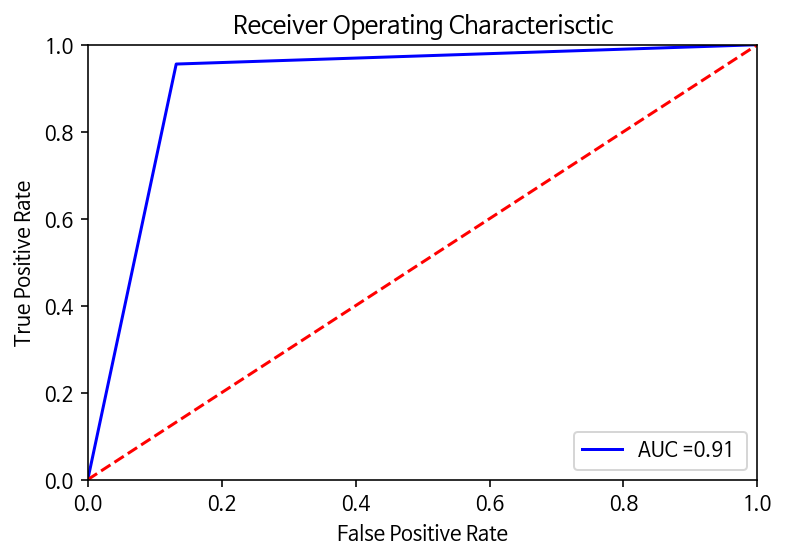

In [26]:
# Library for Analysing the ML model
from sklearn import metrics

# 모델 생성
clf=KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
probs =clf.predict_proba(X_test)
preds =probs[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)

#method I :plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characterisctic')
plt.plot(fpr,tpr,'b',label="AUC =%0.2f " %roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [27]:
# test data를 가지고 y_hat을 예측 (분류)
y_hat = clf.predict(X_test)

# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test,y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        53
           1       0.92      0.96      0.94        90

    accuracy                           0.92       143
   macro avg       0.92      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



In [28]:
# sklearn 을 이용하면 전부 계산
print('accuracy: ',metrics.accuracy_score(y_test,y_hat))
print('precision: ',metrics.precision_score(y_test,y_hat))
print('recall: ', metrics.recall_score(y_test,y_hat))
print('f1: ',metrics.f1_score(y_test,y_hat))

accuracy:  0.9230769230769231
precision:  0.9247311827956989
recall:  0.9555555555555556
f1:  0.9398907103825136
